# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### There were 17 campaigns represented in this data

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [134]:
from scipy.stats import uniform
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import warnings

In [135]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

In [136]:
warnings.filterwarnings('ignore')
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [137]:
# Function to show percentage in count plots
def pct_in_group(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

In [138]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<Axes: xlabel='age', ylabel='Count'>

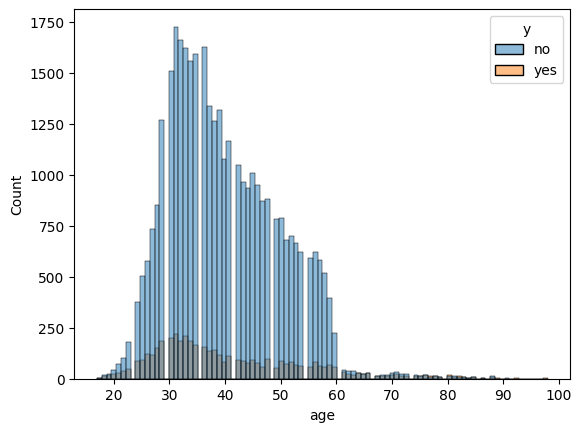

In [140]:
# Age distribution
sns.histplot(data=df, x='age', hue='y')

<Axes: xlabel='age', ylabel='Count'>

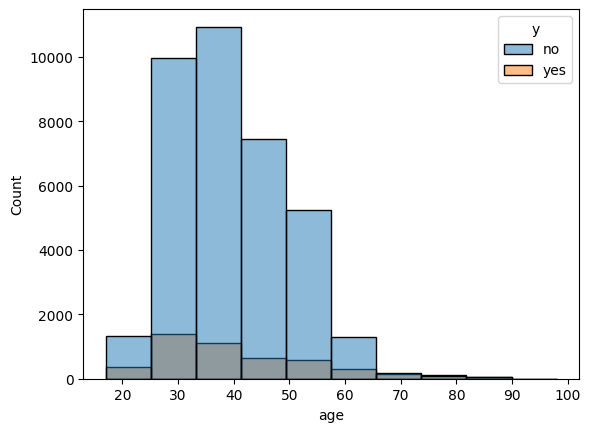

In [141]:
sns.histplot(data=df, x='age', hue='y', bins=10)

Customers' age is somewhat normally distributed, with mean in the 30-40 years range. Younger customers (30 and below) and older (60 and above) are more likely to sign up for the term deposit.

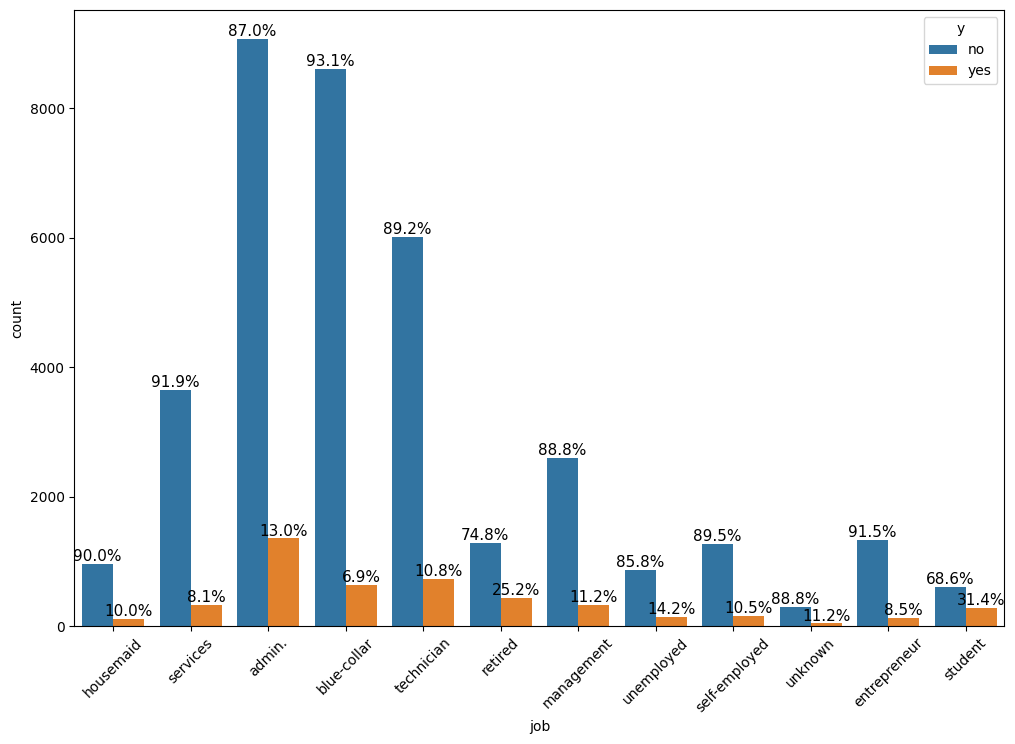

In [142]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = "job", hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

Majority of the customers' job are administrative, blue-collar, technician or services. Retired persons and students are more likely to subscribe to term deposits.

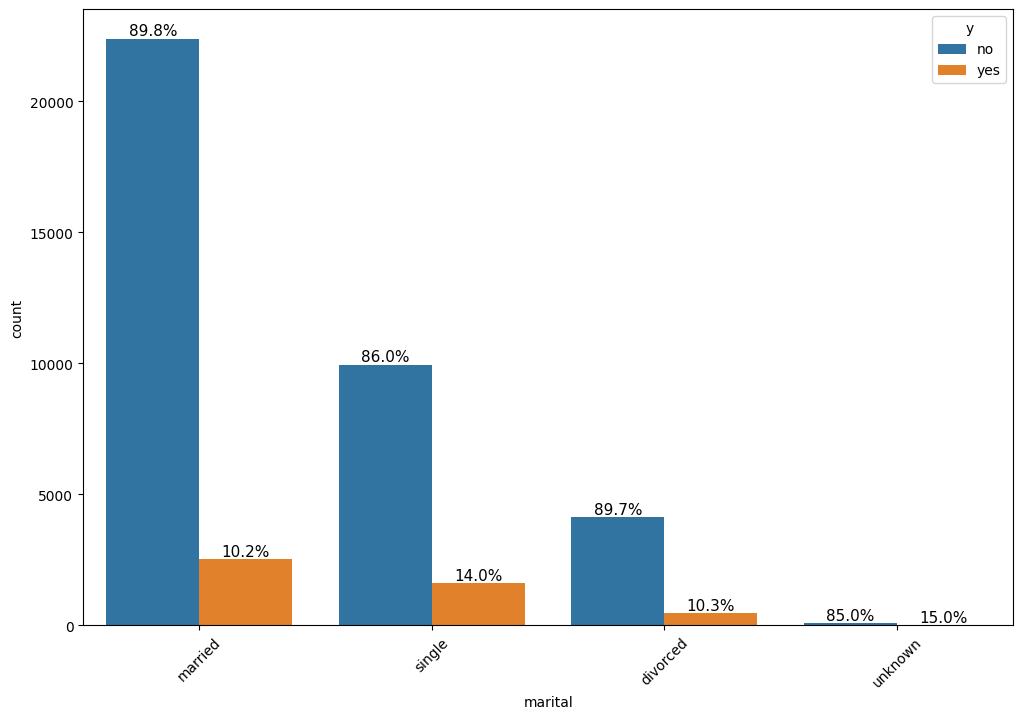

In [143]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'marital', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

Majority of the customers are married. Single customers are more likely to subscribe to the services.

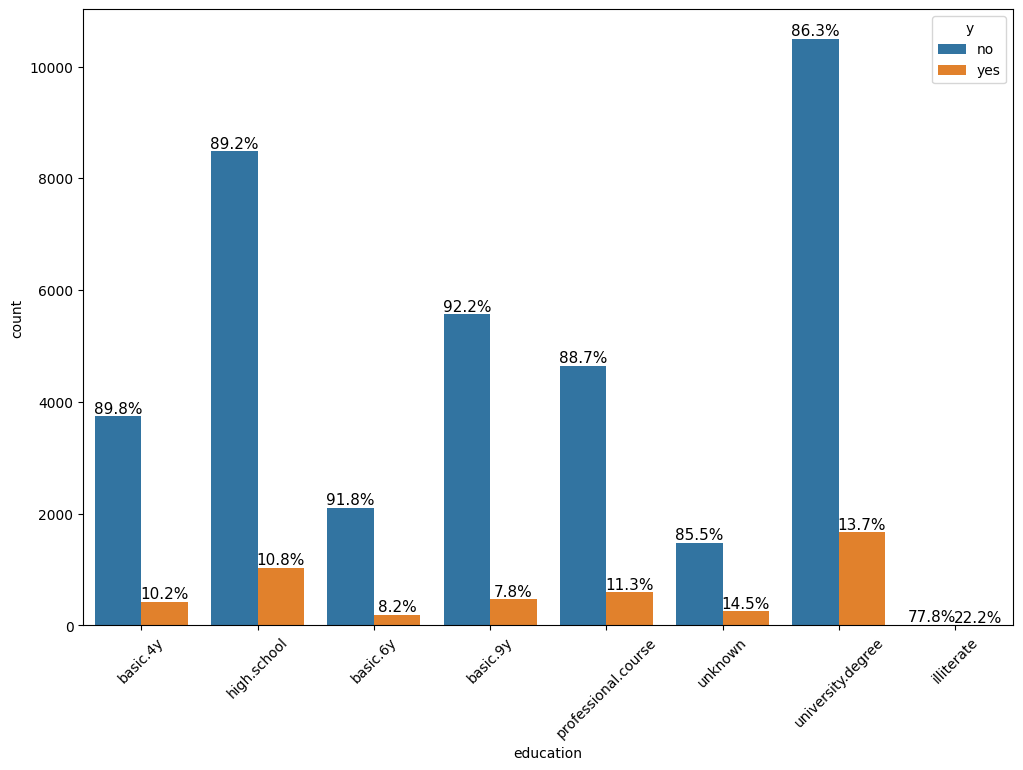

In [144]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'education', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

Most customers have finished high school or have a university degree. Customers with university degree sign up at a higher rate.

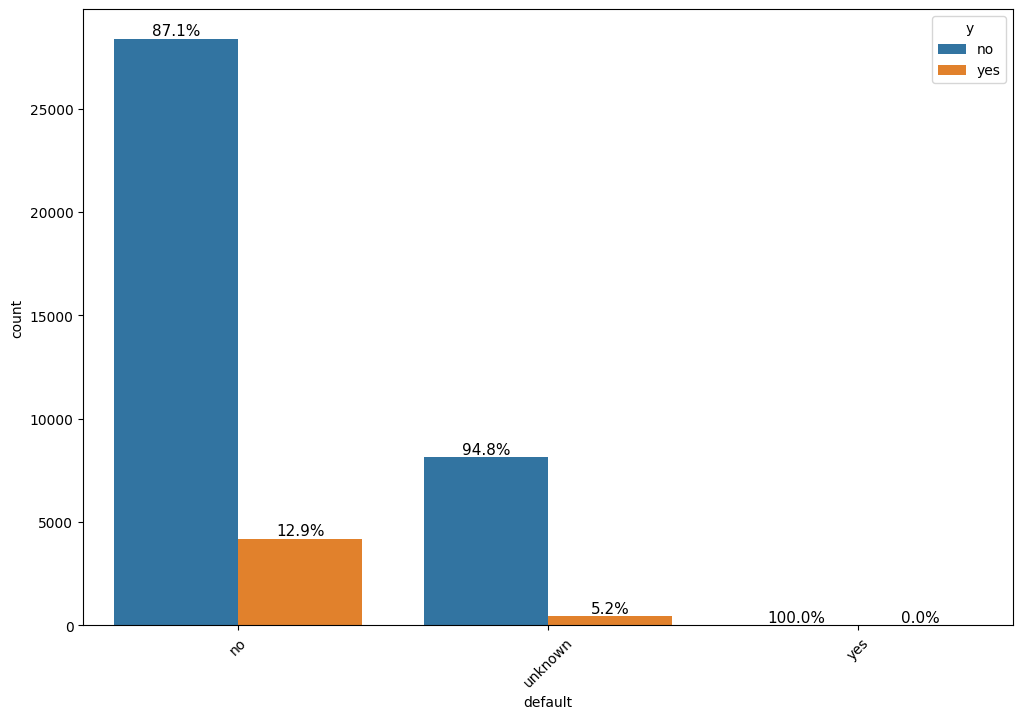

In [145]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'default', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

In [146]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Only 3 customers had a credit default. Default is unknown for a big portion of the customers. This feature can be ignored when building the model.

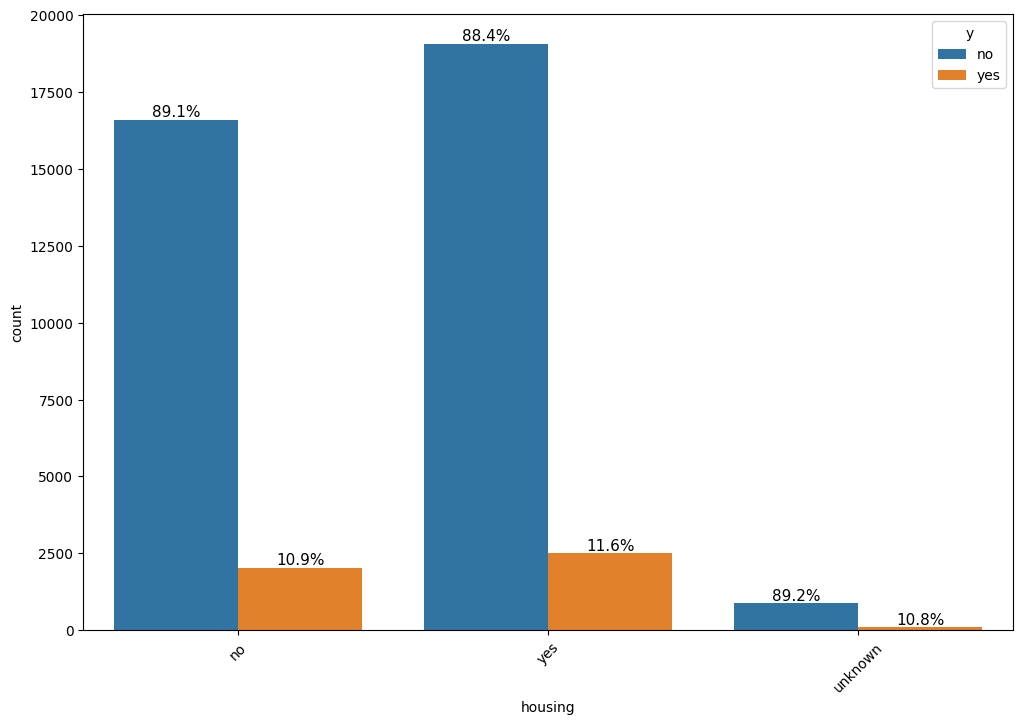

In [147]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'housing', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

The data set is more or less evenly distributed between customers who have a housing loan and those who do not. The sign up rate between the two groups are similar, with customers who have a housing loan having a slightly higher rate of subscribing to term deposits. 

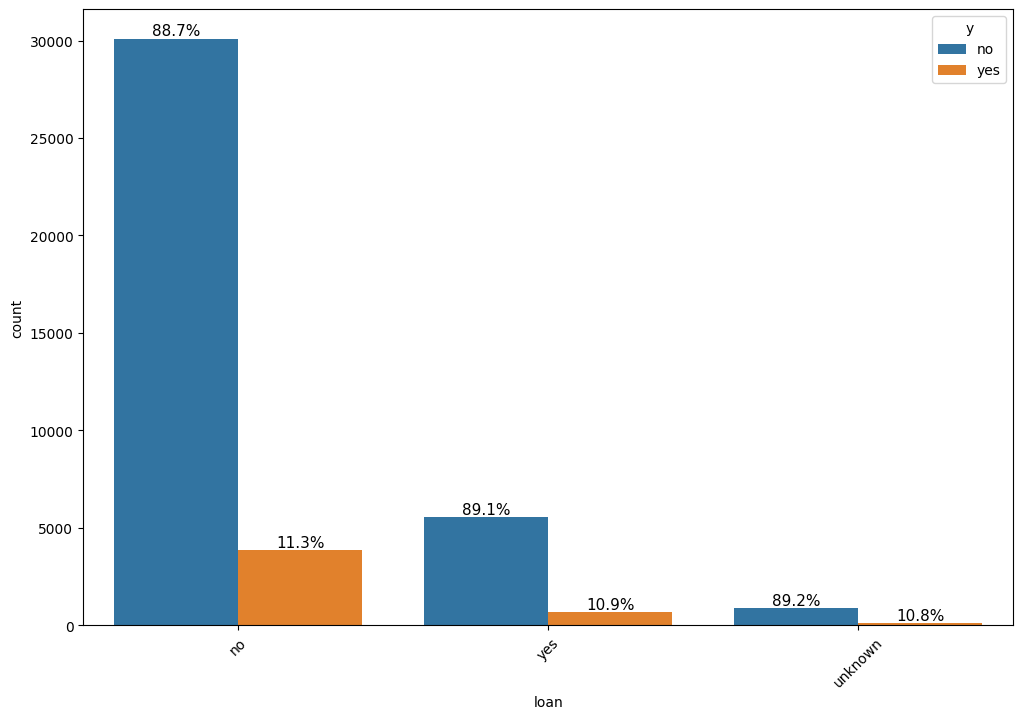

In [148]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'loan', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

Majority of customers do not have a personal loan. Those who do not have a personal loan are slightly more likely to sign up for the term deposit. 

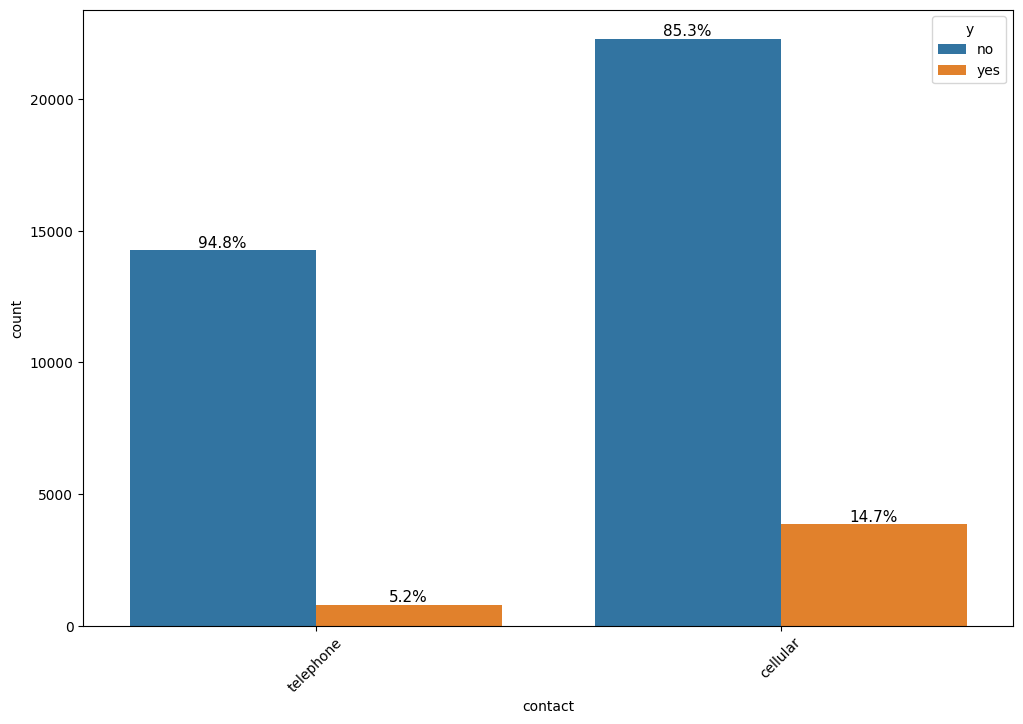

In [149]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'contact', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

Majority of customers were contacted via cell, these customers seem to have a higher rate of signing up for term deposits. 

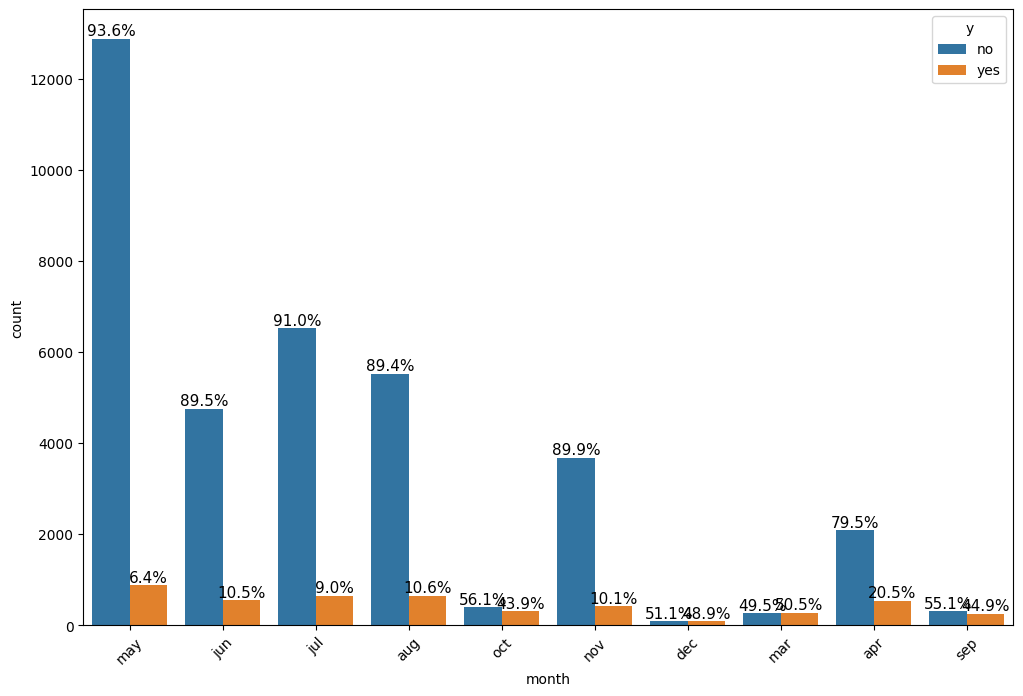

In [150]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'month', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

Last contact usually occurs in April through August, and November. However, the sign up rate for term deposits is higher for customers last contacted in other months.  

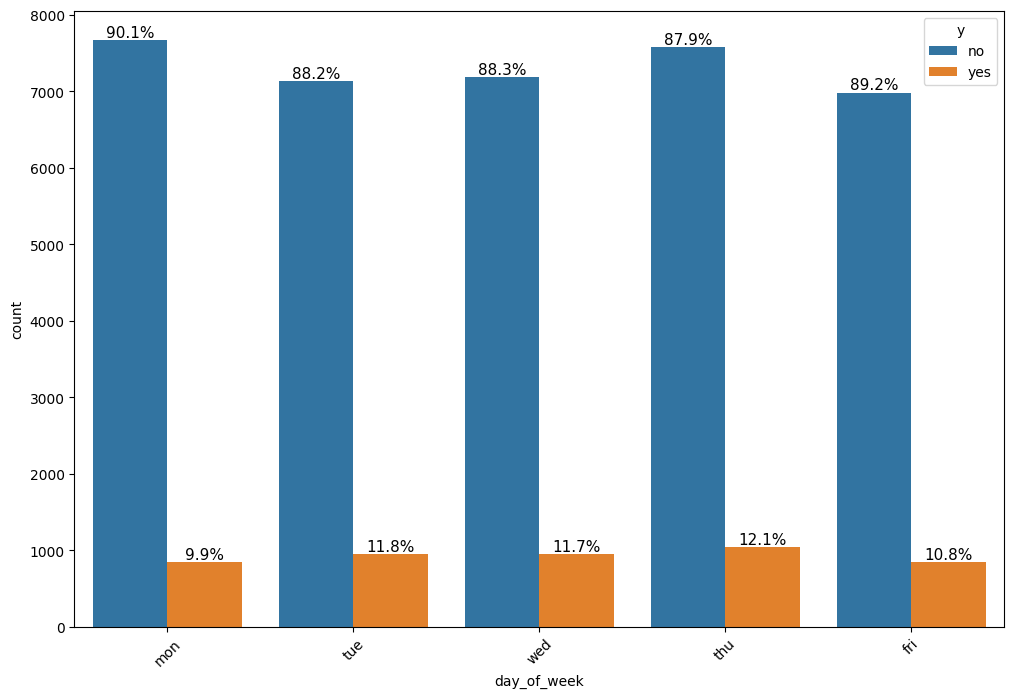

In [151]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'day_of_week', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

Last contact day of week is evenly distributed across Monday through Friday, with a slightly higher sign up rate for customers contacted Tuesday, Wednesday or Thursday. This feature may not be relevant for the classification model.

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

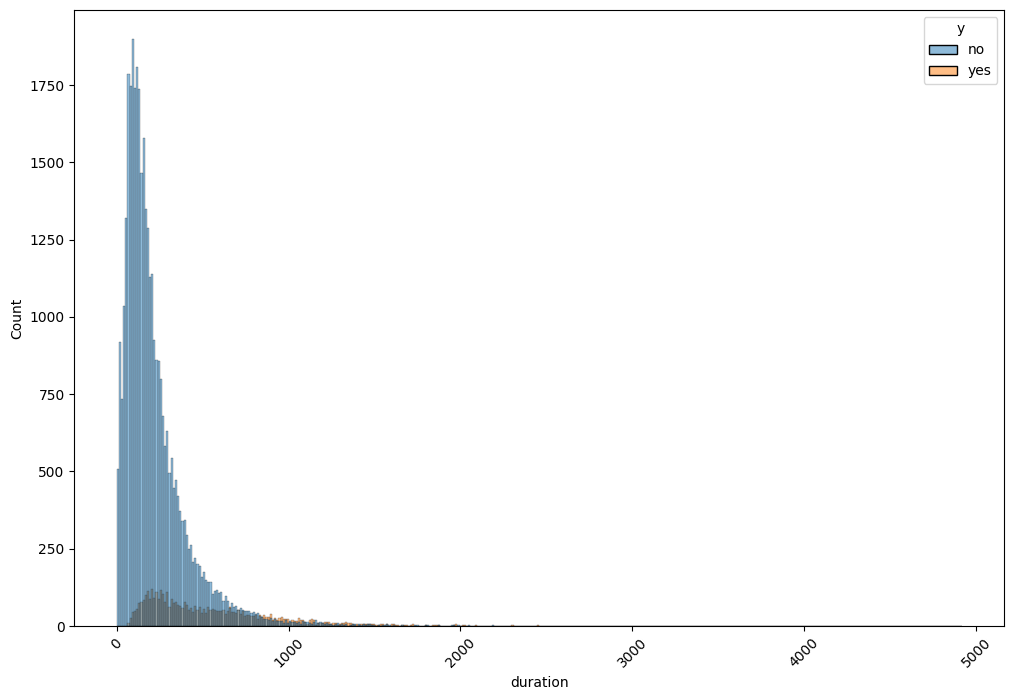

In [152]:
plt.figure(figsize=(12, 8))
sns.histplot(data = df, x = 'duration', hue='y')
plt.xticks(rotation=45)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

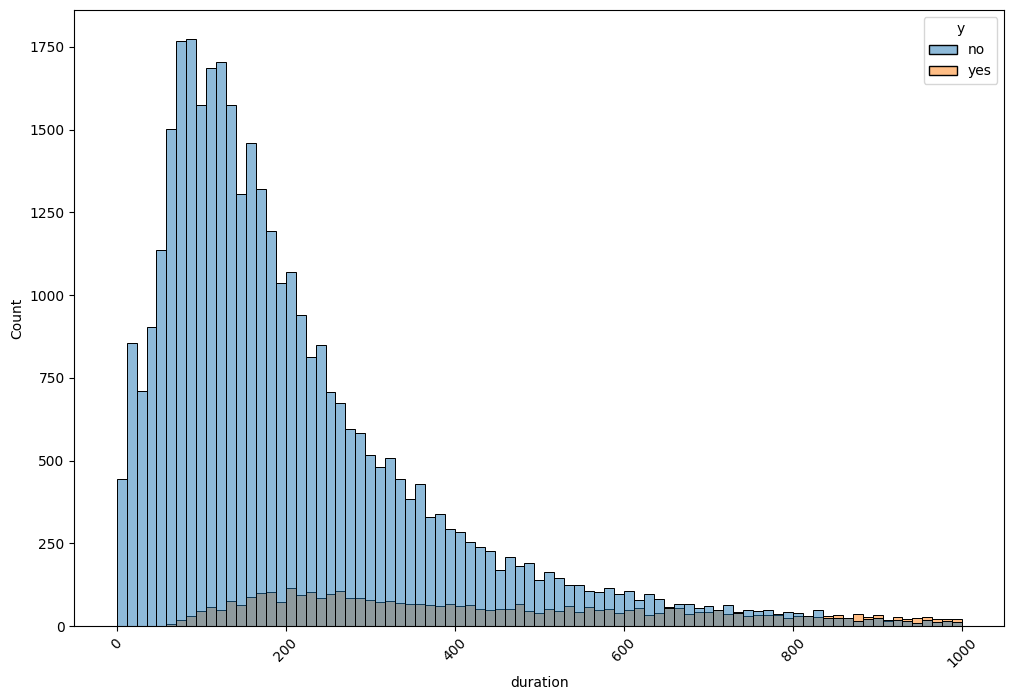

In [153]:
plt.figure(figsize=(12, 8))
sns.histplot(data = df.query('duration <= 1000'), x = 'duration', hue='y')
plt.xticks(rotation=45)

Higher duration of the last contact call means a higher likelihood of the customer signing up for term deposit. As described in the dataset, duration may be used to benchmark but not as a feature in the predictive model.

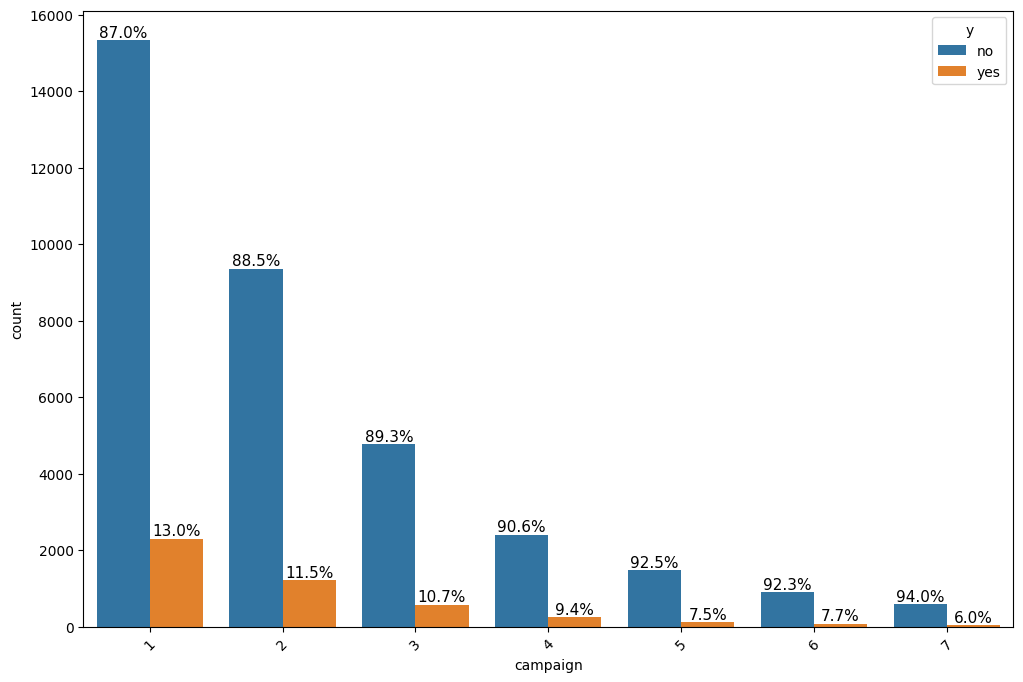

In [154]:
plt.figure(figsize=(12, 8))

ax3 = sns.countplot(data = df.query('campaign <= 7'), x = 'campaign', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

Most customers are contacted less 4 times in the campaign. The likelihood of subscribing to term deposits decreases as the number of times contacted increases.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '25'),
  Text(24, 0, '26'),
  Text(25, 0, '27'),
  Text(26, 0, '999')])

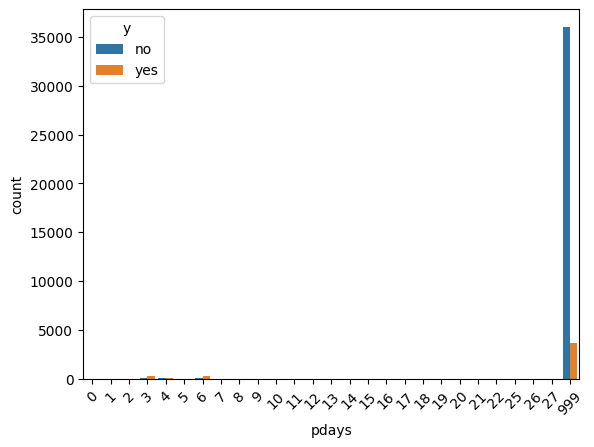

In [155]:
sns.countplot(data = df, x = 'pdays', hue='y')
plt.xticks(rotation=45)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30')])

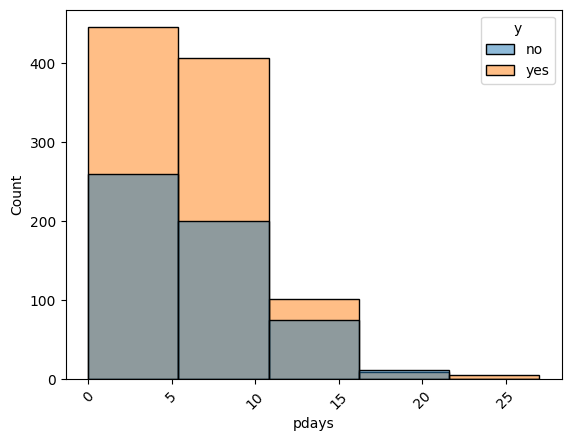

In [156]:
sns.histplot(data = df.query('pdays < 999'), x = 'pdays', hue='y', bins=5)
plt.xticks(rotation=45)

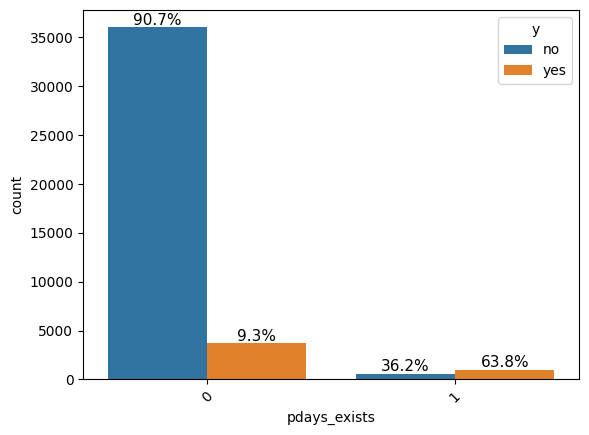

In [157]:
df_pdays = df[['pdays','y']]
df_pdays['pdays_exists'] = df['pdays'].apply(lambda x: 1 if x < 999 else 0)

ax3 = sns.countplot(data = df_pdays, x = 'pdays_exists', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

In [158]:
df.pdays.value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

Majority of the customers were not contacted for any previous campaign. However, customers who were contacted previosuly have a higher likelihood of signing up for term deposits. 

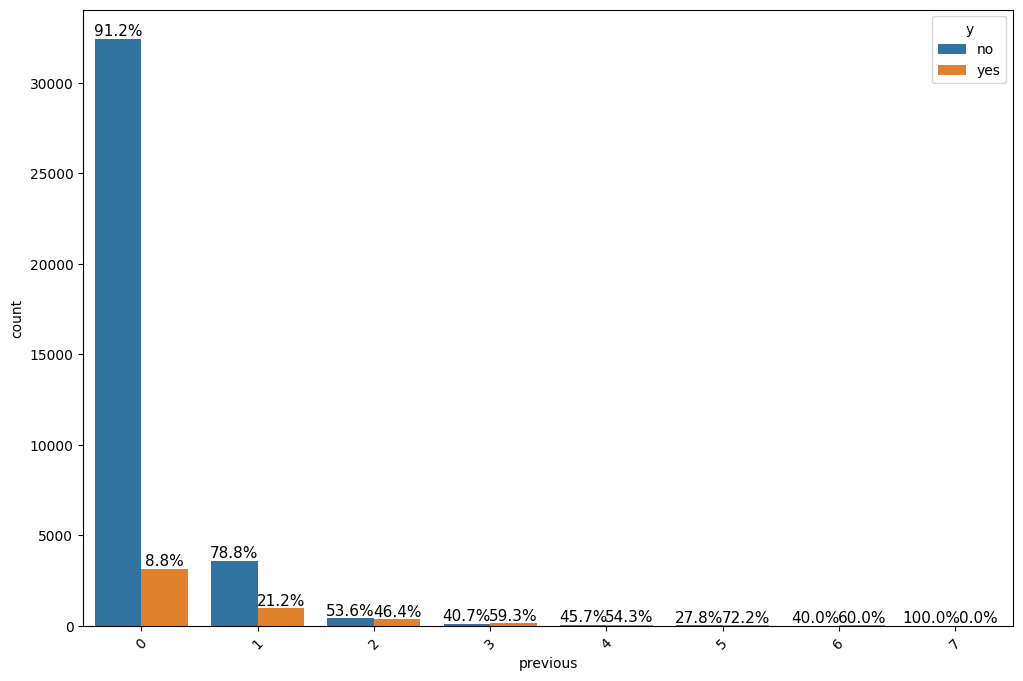

In [159]:
#sns.countplot(data = df, x = 'previous', hue='y')
#plt.xticks(rotation=45)
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'previous', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

Customers who were contacted in previous campaigns have a higher chance of signing up. 

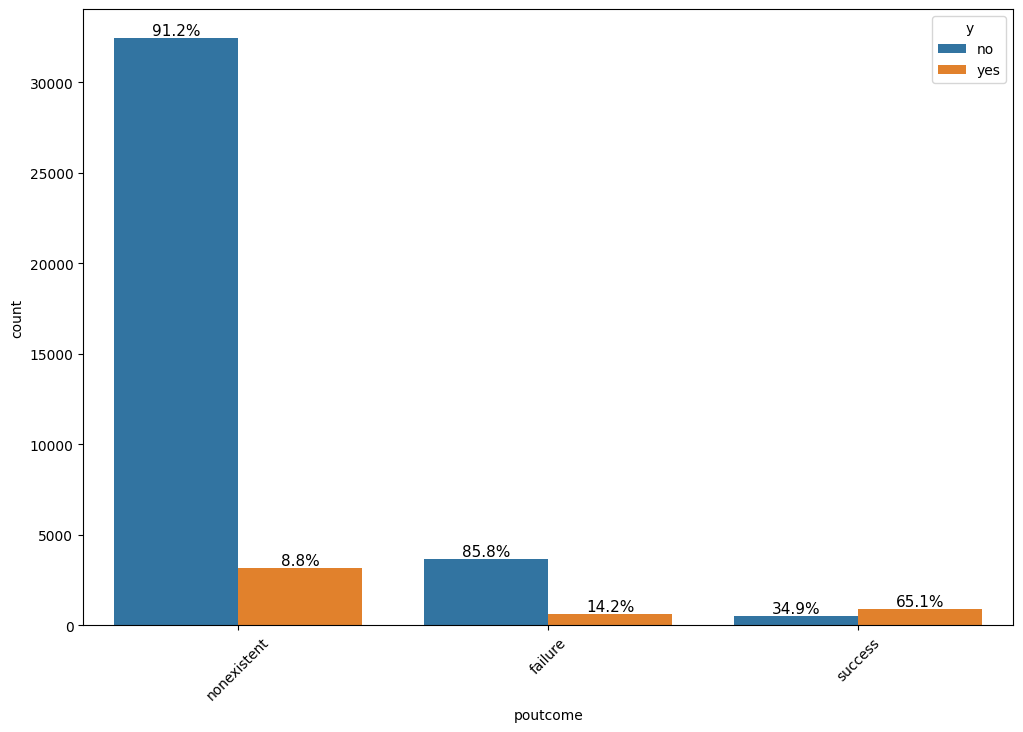

In [160]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'poutcome', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

In [161]:
pd.crosstab(df['pdays'], df['poutcome'])

poutcome,failure,nonexistent,success
pdays,,,
0,0,0,15
1,0,0,26
2,0,0,61
3,4,0,435
4,2,0,116
5,4,0,42
6,25,0,387
7,15,0,45
8,6,0,12


In [162]:
pd.crosstab(df['previous'], df['poutcome'])

poutcome,failure,nonexistent,success
previous,,,
0,0,35563,0
1,3696,0,865
2,434,0,320
3,88,0,128
4,30,0,40
5,3,0,15
6,1,0,4
7,0,0,1


The outcome of the previous marketing campaign is nonexistent for most customers, since they were not contacted for previous campaigns. The rows with poutcome=nonexistent corresponds to pdays=0 and previous=0.

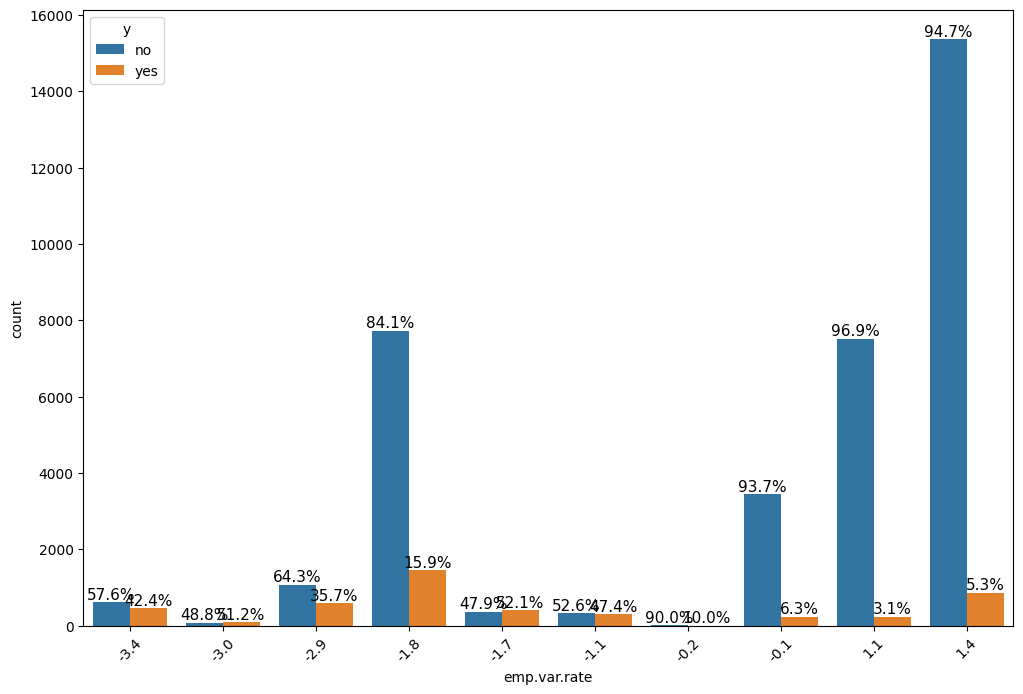

In [163]:

plt.figure(figsize=(12, 8))

ax3 = sns.countplot(data = df, x = 'emp.var.rate', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

In [164]:
df['emp.var.rate'].value_counts()

emp.var.rate
 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64

Negative employment variation rate corresponds to higher rate of subscription. 

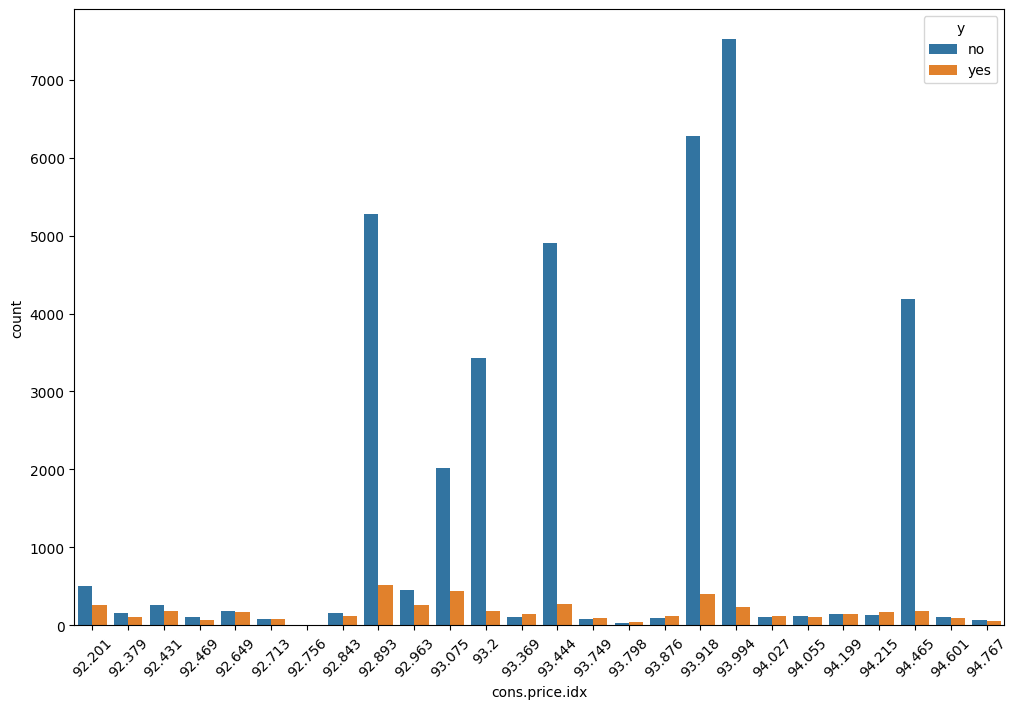

In [165]:
#sns.countplot(data = df, x = 'cons.price.idx', hue='y')
#plt.xticks(rotation=45)

plt.figure(figsize=(12, 8))

ax3 = sns.countplot(data = df, x = 'cons.price.idx', hue='y')
#pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

In [166]:
df['cons.price.idx'].value_counts()

cons.price.idx
93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: count, dtype: int64

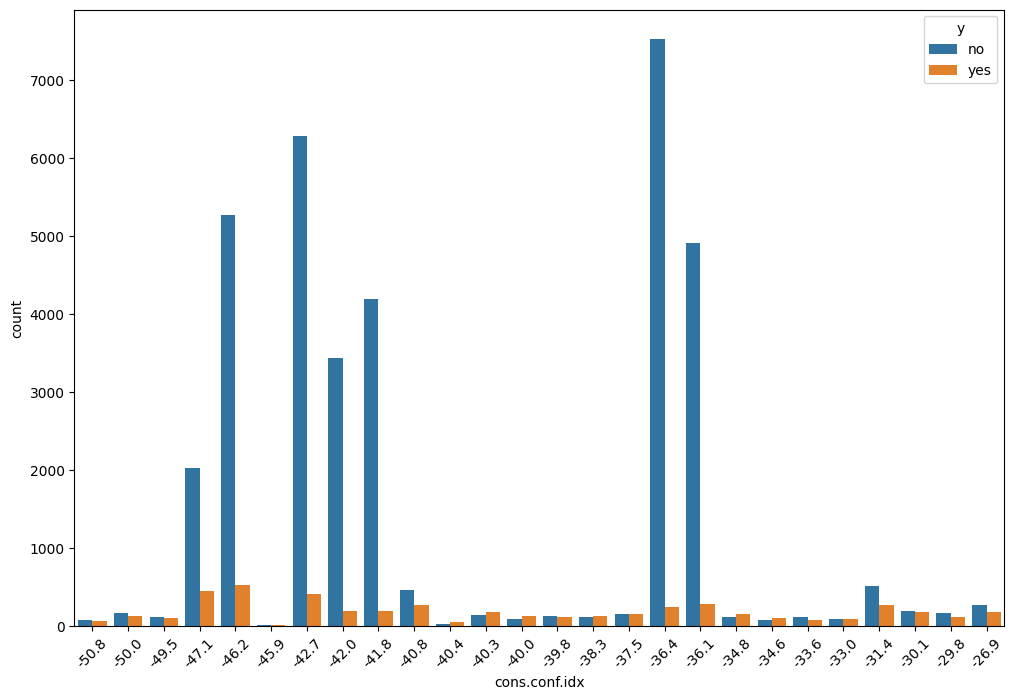

In [167]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'cons.conf.idx', hue='y')
#pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

In [168]:
df['cons.conf.idx'].value_counts()

cons.conf.idx
-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: count, dtype: int64

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

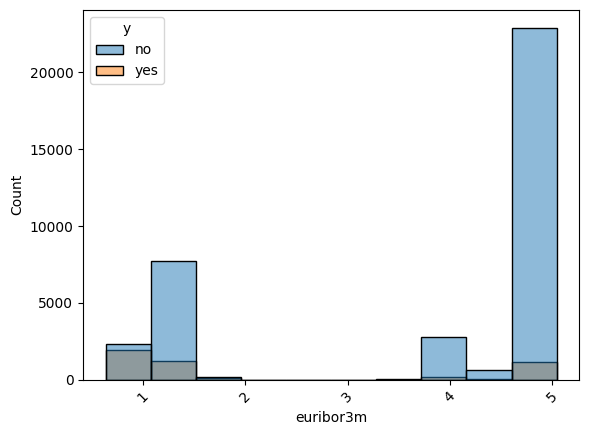

In [169]:
sns.histplot(data = df, x = 'euribor3m', hue='y', bins=10)
plt.xticks(rotation=45)

In [170]:
df['euribor3m'].value_counts()

euribor3m
4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: count, Length: 316, dtype: int64

Lower euribor 3 month rates correspond to higher rate of subscription to term deposits.

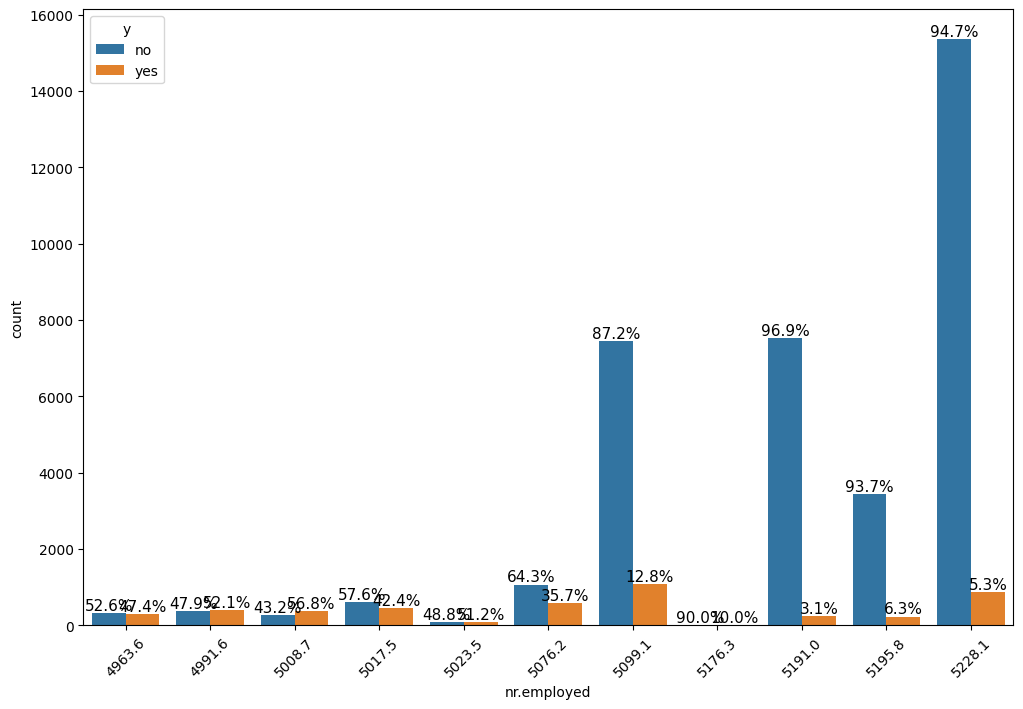

In [171]:
#sns.countplot(data = df, x = 'nr.employed', hue='y')
#plt.xticks(rotation=45)

plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df, x = 'nr.employed', hue='y')
pct_in_group(ax3)
plt.xticks(rotation=45)
plt.show()

In [172]:
df['nr.employed'].value_counts()

nr.employed
5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64

Lower number of employees corresponds to higher subscription rate.

In [173]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [174]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [175]:
df.size

864948

Many of the features are coded with 'unknown' for missing values. These features need to be examined to determine whether the corresponding records can be dropped from the dataset.

In addition, many of the features are categorical and need to be encoded before they can be used in the models.

In [176]:
df.shape

(41188, 21)

In [177]:
# Check number of 'unknown' value in features
(df == 'unknown').sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [178]:
# The column default contains a large number of 'unknown' values, and only 3 rows with 'yes'. 
# This column can be dropped
df.drop(columns=['default'], inplace=True)

In [179]:
# Drop column duration as it is is only known after the call is placed
df.drop(columns=['duration'], inplace=True)

In [180]:
# Drop rows that contain 'unknown'
df_clean = df[(df['job'] != 'unknown') & (df['marital'] != 'unknown') & (df['education'] != 'unknown') & (df['housing'] != 'unknown') & (df['loan'] != 'unknown')]

In [181]:
df_clean.reset_index(inplace=True)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Business Objective

The business objective of this exercise is to classify customers into two groups based on their demographic and campaign contact characteristics as well as broader economic indicators at the time of contact - those who are likely to subscribe to a term deposit and those who are not. This classification model can then be used by the bank to focus and time their marketing campaigns on those customers who are likely to subscribe.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [182]:
df_clean.drop(columns=['index'], inplace=True)
df_clean.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [183]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38245 entries, 0 to 38244
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   campaign        38245 non-null  int64  
 10  pdays           38245 non-null  int64  
 11  previous        38245 non-null  int64  
 12  poutcome        38245 non-null  object 
 13  emp.var.rate    38245 non-null  float64
 14  cons.price.idx  38245 non-null  float64
 15  cons.conf.idx   38245 non-null  float64
 16  euribor3m       38245 non-null  float64
 17  nr.employed     38245 non-null 

In [260]:
# Encode categorical features
categorical_columns = df_clean.select_dtypes(include=['object']).columns.values
categorical_columns

array(['job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'], dtype=object)

In [261]:
df_encoded = pd.get_dummies(df_clean, columns=['job', 'marital', 'education', 'housing', 'loan', 'contact', 
                                               'month', 'day_of_week', 'poutcome'])


In [262]:
df_encoded['y'] = LabelEncoder().fit_transform(df_encoded['y'])

In [263]:
pd.set_option('display.max_columns', None)

In [264]:
df_encoded.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


In [265]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38245 entries, 0 to 38244
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  int64  
 1   campaign                       38245 non-null  int64  
 2   pdays                          38245 non-null  int64  
 3   previous                       38245 non-null  int64  
 4   emp.var.rate                   38245 non-null  float64
 5   cons.price.idx                 38245 non-null  float64
 6   cons.conf.idx                  38245 non-null  float64
 7   euribor3m                      38245 non-null  float64
 8   nr.employed                    38245 non-null  float64
 9   y                              38245 non-null  int64  
 10  job_admin.                     38245 non-null  bool   
 11  job_blue-collar                38245 non-null  bool   
 12  job_entrepreneur               38245 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [266]:
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [267]:
y_test.value_counts()

y
0    10180
1     1294
Name: count, dtype: int64

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [268]:
df_clean['y'].value_counts(normalize = True)[0]

0.8886651849915022

Baseline performance is 0.8886

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [269]:
lr_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('logreg', LogisticRegression())
])

In [270]:
%%time
lr = lr_pipe.fit(X_train, y_train)

CPU times: user 1.6 s, sys: 264 ms, total: 1.87 s
Wall time: 214 ms


### Problem 9: Score the Model

What is the accuracy of your model?

In [271]:
# Accuracy on the training set
y_pred_train_lr = lr.predict(X_train)
lr_train_acc = accuracy_score(y_train, y_pred_train_lr)
lr_train_acc

0.9018340741847521

In [272]:
# Accuracy on the test set
y_pred_test_lr = lr.predict(X_test)
lr_test_acc = accuracy_score(y_test, y_pred_test_lr)
lr_test_acc

0.8996862471675091

Accuracy score of the Logistic Regressiom model is 0.8999

In [273]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10180
           1       0.68      0.21      0.32      1294

    accuracy                           0.90     11474
   macro avg       0.79      0.60      0.63     11474
weighted avg       0.88      0.90      0.88     11474



In [274]:
confusion_matrix(y_test, y_pred_test_lr)

array([[10050,   130],
       [ 1021,   273]])

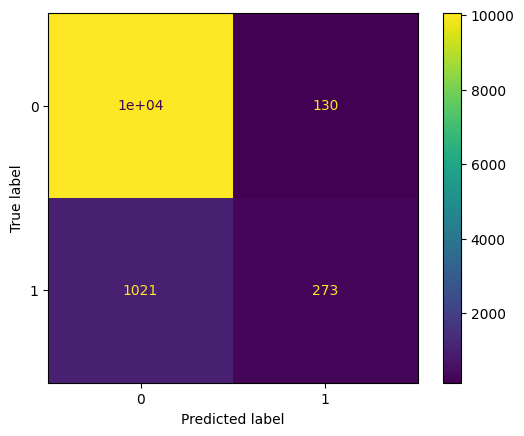

In [275]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_lr)).plot()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### KNN model with default settings

In [276]:
knn_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [277]:
%%time
knn = knn_pipe.fit(X_train, y_train)

CPU times: user 38.8 ms, sys: 7.96 ms, total: 46.7 ms
Wall time: 43.7 ms


In [278]:
# Accuracy on the training set
y_pred_train_knn = knn.predict(X_train.values)
knn_train_acc = accuracy_score(y_train, y_pred_train_knn)
knn_train_acc

0.9137125994546338

In [279]:
# Accuracy on the test set
y_pred_test_knn = knn.predict(X_test.values)
knn_test_acc = accuracy_score(y_test, y_pred_test_knn)
knn_test_acc

0.8922781941781419

In [283]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10180
           1       0.54      0.27      0.36      1294

    accuracy                           0.89     11474
   macro avg       0.73      0.62      0.65     11474
weighted avg       0.87      0.89      0.88     11474



#### Decision Tree model with default settings

In [284]:
dt_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('dtree', DecisionTreeClassifier())
])

In [285]:
%%time
dt = dt_pipe.fit(X_train, y_train)

CPU times: user 137 ms, sys: 8.87 ms, total: 146 ms
Wall time: 143 ms


In [286]:
# Accuracy on the training set
y_pred_train_dt = dt.predict(X_train)
dt_train_acc = accuracy_score(y_train, y_pred_train_dt)
dt_train_acc

0.9948825221321579

In [287]:
# Accuracy on the test set
y_pred_test_dt = dt.predict(X_test)
dt_test_acc = accuracy_score(y_test, y_pred_test_dt)
dt_test_acc

0.8393759804776015

In [288]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10180
           1       0.30      0.33      0.32      1294

    accuracy                           0.84     11474
   macro avg       0.61      0.62      0.61     11474
weighted avg       0.85      0.84      0.84     11474



#### SVM model with default settings

In [289]:
svm_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC())
])

In [290]:
%%time
svc = svm_pipe.fit(X_train, y_train)

CPU times: user 16.9 s, sys: 209 ms, total: 17.1 s
Wall time: 17.1 s


In [291]:
# Accuracy on the training set
y_pred_train_svc = svc.predict(X_train)
svc_train_acc = accuracy_score(y_train, y_pred_train_svc)
svc_train_acc

0.9126666915692354

In [292]:
# Accuracy on the test set
y_pred_test_svc = svc.predict(X_test)
svc_test_acc = accuracy_score(y_test, y_pred_test_svc)
svc_test_acc

0.9002091685549939

In [294]:
print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10180
           1       0.67      0.23      0.34      1294

    accuracy                           0.90     11474
   macro avg       0.79      0.61      0.64     11474
weighted avg       0.88      0.90      0.88     11474



In [293]:
df_compare = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']})

In [295]:
df_compare['Train Time'] = [1.87, 0.05, 0.14, 17.10]

In [296]:
df_compare['Train Accuracy'] = [0.90, 0.91, 0.99, 0.91]
df_compare['Test Accuracy'] = [0.89, 0.89, 0.84, 0.90]

In [297]:
df_compare.set_index('Model', inplace=True)
df_compare

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,1.87,0.90,0.89
KNN,0.05,0.91,0.89
Decision Tree,0.14,0.99,0.84
SVM,17.10,0.91,0.90


All the models have high training accuracy. Decision tree model overfits the training data and has a lower accuracy on the test set. SVM model's test accuracy is almost the same as the training set accuracy.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Features housing, loan and the economic indicators cons.price.idx and cons.conf.idx can be dropped as they have low correlation with the rate of subscription to term deposits.

In [300]:
df_clean2 = df_clean.drop(columns=['housing', 'loan', 'cons.price.idx', 'cons.conf.idx'], inplace=False)
df_clean2.head()

,age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,telephone,may,mon,1,999,0,nonexistent,1.1,4.857,5191.0,no
1,57,services,married,high.school,telephone,may,mon,1,999,0,nonexistent,1.1,4.857,5191.0,no
2,37,services,married,high.school,telephone,may,mon,1,999,0,nonexistent,1.1,4.857,5191.0,no
3,40,admin.,married,basic.6y,telephone,may,mon,1,999,0,nonexistent,1.1,4.857,5191.0,no
4,56,services,married,high.school,telephone,may,mon,1,999,0,nonexistent,1.1,4.857,5191.0,no


In [301]:
# Encode categorical features
categorical_columns_v2 = df_clean2.select_dtypes(include=['object']).columns.values
categorical_columns_v2



array(['job', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'poutcome', 'y'], dtype=object)

In [302]:
df_encoded_v2 = pd.get_dummies(df_clean2, columns=['job', 'marital', 'education', 'contact', 
                                               'month', 'day_of_week', 'poutcome'])
label_encoder = LabelEncoder()
df_encoded_v2['y'] = label_encoder.fit_transform(df_encoded_v2['y'])
df_encoded_v2.head()

,age,campaign,pdays,previous,emp.var.rate,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,4.857,5191.0,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,57,1,999,0,1.1,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,37,1,999,0,1.1,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,40,1,999,0,1.1,4.857,5191.0,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,56,1,999,0,1.1,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


In [303]:
df_encoded_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38245 entries, 0 to 38244
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  int64  
 1   campaign                       38245 non-null  int64  
 2   pdays                          38245 non-null  int64  
 3   previous                       38245 non-null  int64  
 4   emp.var.rate                   38245 non-null  float64
 5   euribor3m                      38245 non-null  float64
 6   nr.employed                    38245 non-null  float64
 7   y                              38245 non-null  int64  
 8   job_admin.                     38245 non-null  bool   
 9   job_blue-collar                38245 non-null  bool   
 10  job_entrepreneur               38245 non-null  bool   
 11  job_housemaid                  38245 non-null  bool   
 12  job_management                 38245 non-null 

In [304]:
# Split the dataset into training and test sets
X2 = df_encoded_v2.drop(columns=['y'])
y2 = df_encoded_v2['y']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

#### Logistic regression on the revised dataset


In [305]:
%%time
lr2 = lr_pipe.fit(X_train2, y_train2)

CPU times: user 507 ms, sys: 38.8 ms, total: 546 ms
Wall time: 88.4 ms


In [306]:
# Accuracy on the training set
y_pred_train_lr2 = lr2.predict(X_train2)
lr_train_acc2 = accuracy_score(y_train2, y_pred_train_lr2)
lr_train_acc2

0.9011617048298532

In [307]:
# Accuracy on the test set
y_pred_test_lr2 = lr2.predict(X_test2)
lr_test_acc2 = accuracy_score(y_test2, y_pred_test_lr2)
lr_test_acc2

0.9007320899424787

In [309]:
precision_score(y_test2, y_pred_test_lr2)

0.6952141057934509

In [311]:
print(classification_report(y_test2, y_pred_test_lr2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10180
           1       0.70      0.21      0.33      1294

    accuracy                           0.90     11474
   macro avg       0.80      0.60      0.64     11474
weighted avg       0.88      0.90      0.88     11474



Logistic regression gives 91% accuracy and 70% precision scores.

##### KNN on the revised dataset

In [312]:
%%time
knn2 = knn_pipe.fit(X_train2, y_train2)

CPU times: user 34.7 ms, sys: 5.59 ms, total: 40.3 ms
Wall time: 39 ms


In [313]:
# Accuracy on the training set
y_pred_train_knn2 = knn2.predict(X_train2.values)
knn_train_acc2 = accuracy_score(y_train2, y_pred_train_knn2)
knn_train_acc2

0.9121437376265362

In [314]:
# Accuracy on the test set
y_pred_test_knn2 = knn2.predict(X_test2.values)
knn_test_acc2 = accuracy_score(y_test2, y_pred_test_knn2)
knn_test_acc2

0.8928882691302075

In [315]:
precision_score(y_test2, y_pred_test_knn2)

0.5525040387722132

In [317]:
print(classification_report(y_test2, y_pred_test_knn2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10180
           1       0.55      0.26      0.36      1294

    accuracy                           0.89     11474
   macro avg       0.73      0.62      0.65     11474
weighted avg       0.87      0.89      0.88     11474



KNN gives 89% accuracy and 55% precision scores.

#### Decision tree on the revised dataset

In [318]:
%%time
dt2 = dt_pipe.fit(X_train2, y_train2)

CPU times: user 125 ms, sys: 9.13 ms, total: 134 ms
Wall time: 132 ms


In [319]:
# Accuracy on the training set
y_pred_train_dt2 = dt2.predict(X_train2)
dt_train_acc2 = accuracy_score(y_train2, y_pred_train_dt2)
dt_train_acc2

0.9893541518807665

In [320]:
# Accuracy on the test set
y_pred_test_dt2 = dt2.predict(X_test2)
dt_test_acc2 = accuracy_score(y_test2, y_pred_test_dt2)
dt_test_acc2

0.8445180407878682

In [321]:
precision_score(y_test2, y_pred_test_dt2)

0.31153846153846154

In [322]:
print(classification_report(y_test2, y_pred_test_dt2))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10180
           1       0.31      0.31      0.31      1294

    accuracy                           0.84     11474
   macro avg       0.61      0.61      0.61     11474
weighted avg       0.84      0.84      0.84     11474



Decision Tree on the revised data gives 84% accuracy and 31% precision scores.

#### SVM on the revised dataset

In [323]:
%%time
svc2 = svm_pipe.fit(X_train2, y_train2)

CPU times: user 13.4 s, sys: 139 ms, total: 13.6 s
Wall time: 13.6 s


In [324]:
# Accuracy on the training set
y_pred_train_svc2 = svc2.predict(X_train2)
svc_train_acc2 = accuracy_score(y_train2, y_pred_train_svc2)
svc_train_acc2

0.9100145680026894

In [325]:
# Accuracy on the test set
y_pred_test_svc2 = svc2.predict(X_test2)
svc_test_acc2 = accuracy_score(y_test2, y_pred_test_svc2)
svc_test_acc2

0.8995990936029283

In [326]:
precision_score(y_test2, y_pred_test_svc2)

0.6748768472906403

In [327]:
print(classification_report(y_test2, y_pred_test_svc2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10180
           1       0.67      0.21      0.32      1294

    accuracy                           0.90     11474
   macro avg       0.79      0.60      0.63     11474
weighted avg       0.88      0.90      0.88     11474



SVM on the revised data set gives 90% accuracy and 67% precision scores.

In [328]:
df_compare_v2 = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']})
df_compare_v2['Train Time'] = [0.55, 0.04, 0.13, 13.6]
df_compare_v2['Train Accuracy'] = [0.90, 0.91, 0.99, 0.91]
df_compare_v2['Test Accuracy'] = [0.90, 0.89, 0.84, 0.90]
df_compare_v2.set_index('Model', inplace=True)
df_compare_v2

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.55,0.90,0.90
KNN,0.04,0.91,0.89
Decision Tree,0.13,0.99,0.84
SVM,13.60,0.91,0.90


The accuracy remains more or less the same for the models with the revised data set, and Decision Tree still appears overfitting.

### Hyperparameter tuning, grid search and performance metrics

Since the data set is imbalanced, precision will be a better metric than accuracy score. The bank would like to target customers who would actually sign up for the term deposit, and a high precision score would be a more desirable metric than accuracy. 

#### Logistic regression 

In [329]:
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear', random_state = 42))

In [330]:
lgr_pipe = Pipeline([('scale', StandardScaler()),
                     ('selector', extractor),
                     ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

In [331]:
%%time
lgr_pipe.fit(X_train, y_train)

CPU times: user 4.5 s, sys: 90.4 ms, total: 4.59 s
Wall time: 3.6 s


Pipeline(steps=[('scale', StandardScaler()),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr', LogisticRegression(max_iter=1000, random_state=42))])

In [332]:
lgr_pipe.score(X_train, y_train)

0.9018340741847521

In [333]:
lgr_pipe.score(X_test, y_test)

0.8996862471675091

In [334]:
lgr_preds = lgr_pipe.predict(X_test)

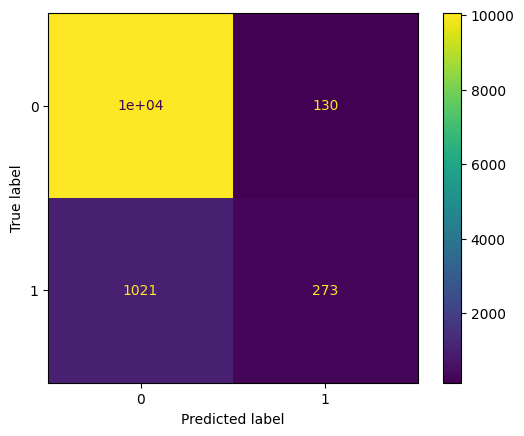

In [335]:
conf_matrix = confusion_matrix(y_test, lgr_preds)
ConfusionMatrixDisplay(conf_matrix).plot()

In [336]:
conf_matrix

array([[10050,   130],
       [ 1021,   273]])

In [337]:
precision_score(y_test, lgr_preds)

0.6774193548387096

In [338]:
print(classification_report(y_test, lgr_preds))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10180
           1       0.68      0.21      0.32      1294

    accuracy                           0.90     11474
   macro avg       0.79      0.60      0.63     11474
weighted avg       0.88      0.90      0.88     11474



Accuracy with Logistic Regression has improved a bit. Precision score is 68%.

#### KNN

In [339]:
params = {'knn__n_neighbors': list(range(10, 22, 2))}
knn_pipe = Pipeline([('scale',StandardScaler()), 
                     ('knn', KNeighborsClassifier())])
knn_grid = GridSearchCV(knn_pipe, param_grid=params)
knn_grid.fit(X_train, y_train)
best_k = list(knn_grid.best_params_.values())[0]
best_k

16

In [340]:
# Accuracy on the training set
y_pred_train_knn = knn_grid.predict(X_train.values)
knn_train_acc = accuracy_score(y_train, y_pred_train_knn)
knn_train_acc

0.9032908744536999

In [341]:
# Accuracy on the test set
y_pred_test_knn = knn_grid.predict(X_test.values)
knn_test_acc = accuracy_score(y_test, y_pred_test_knn)
knn_test_acc

0.898901865086282

Accuracy on the test data set is close to the training accuracy with a higher n_neighbors value (16).

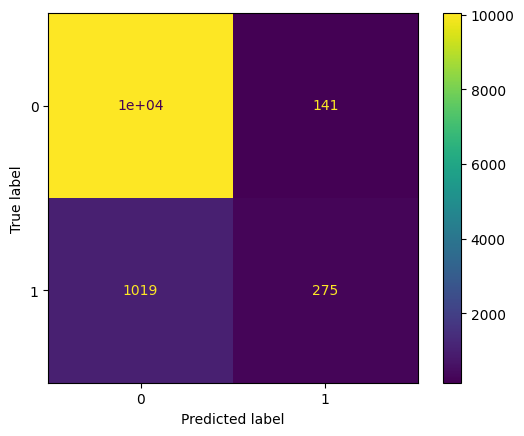

In [342]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)
ConfusionMatrixDisplay(conf_matrix_knn).plot()

In [343]:
conf_matrix_knn

array([[10039,   141],
       [ 1019,   275]])

In [344]:
precision_score(y_test, y_pred_test_knn)

0.6610576923076923

In [345]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10180
           1       0.66      0.21      0.32      1294

    accuracy                           0.90     11474
   macro avg       0.78      0.60      0.63     11474
weighted avg       0.88      0.90      0.88     11474



With the KNN model, accuracy score is 90%, but precision score is 66%. 

#### Decision tree

In [354]:
params = {'max_depth': [1, 2, 5, 10, 15, 20, 30],
         'min_samples_split': [0.1, 0.2, 0.05]}

In [355]:
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)
grid_train_acc = grid_dt.score(X_train, y_train)
grid_train_acc

0.9007881662993538

In [356]:
grid_test_acc = grid_dt.score(X_test, y_test)
grid_test_acc

0.9005577828133171

In [357]:
best_params = grid_dt.best_params_
best_params

{'max_depth': 5, 'min_samples_split': 0.1}

In [358]:
precision_score(y_test, grid_dt.predict(X_test))

0.7368421052631579

In [359]:
print(classification_report(y_test, grid_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10180
           1       0.74      0.18      0.29      1294

    accuracy                           0.90     11474
   macro avg       0.82      0.59      0.62     11474
weighted avg       0.89      0.90      0.87     11474



In [360]:
confusion_matrix(y_test, grid_dt.predict(X_test))

array([[10095,    85],
       [ 1056,   238]])

Test accuracy has improved with these parameters for Decision Tree classifier, but precision score iis 73%. 

#### SVM

In [361]:
svc = svm_pipe.fit(X_train, y_train)

In [362]:
# Accuracy on the training set
y_pred_train_svc = svc.predict(X_train)
svc_train_acc = accuracy_score(y_train, y_pred_train_svc)
svc_train_acc

0.9126666915692354

In [363]:
# Accuracy on the test set
y_pred_test_svc = svc.predict(X_test)
svc_test_acc = accuracy_score(y_test, y_pred_test_svc)
svc_test_acc

0.9002091685549939

In [364]:
precision_score(y_test, y_pred_test_svc)

0.671264367816092

Accuracy of SVM the model is 90%, while the precision score is 67%.

In [365]:
df_compare_ps = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']})
df_compare_ps['Precision Score - 1st pass'] = [0.68, 0.54, 0.30, 0.67]
df_compare_ps['Precision Score - 2nd pass'] = [0.70, 0.55, 0.31, 0.67]
df_compare_ps['Precision Score - 3rd pass'] = [0.68, 0.66, 0.74, 0.67]
df_compare_ps.set_index('Model', inplace=True)
df_compare_ps

,Precision Score - 1st pass,Precision Score - 2nd pass,Precision Score - 3rd pass
Model,,,
Logistic Regression,0.68,0.70,0.68
KNN,0.54,0.55,0.66
Decision Tree,0.30,0.31,0.74
SVM,0.67,0.67,0.67


Tuning the hyper parameters resulted in an improvement in the KNN and Decision Tree models' precision score. Of the models, the Decision Tree model has the highest precision score. Of all the models, this is the best performing one for this banking classification data set.